### Load Libraries

In [1]:
library('tidyverse')
library('Seurat')
library('scCustomize')
library('ggpubr')
library('scales')
library('pheatmap')
library('ComplexHeatmap')
library('stringr')
library('caret')
library('colorRamp2')
library('RColorBrewer')
library('gridExtra')
library('cowplot')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


scCustomize v2.1.2
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.


Attaching package: ‘scales’


The following ob

### Load RDS Files

In [2]:
getwd()

[1] "/home/jupyter/CS15_WHBL/CWB_Paper/02_Final_Notebooks/01_Figure1"

In [3]:
rna <- readRDS('/home/jupyter/CS15_WHBL/CWB_Paper/01_Final_Data/01_Data/Fig_1_Final.rds')

In [4]:
adt <- readRDS('/home/jupyter/CS15_WHBL/CWB_Paper/01_Final_Data/01_Data/Fig_1_Final.rds')
DefaultAssay(object = adt) <- "ADT"

### Color Definitions

In [5]:
red <- '#F8766D'
blue <- '#619CFF'
green <- '#00BA38'
yl_or <- '#FAC05E'

pal2 <- c(red, blue)
pal4 <- c(red, blue, green, yl_or)


### Sample Rename

In [6]:
rna$sample3 <- gsub('Sample-1','Donor 1', rna$sample3)
rna$sample3 <- gsub('Sample-2','Donor 2', rna$sample3)
rna$sample3 <- gsub('Sample-3','Donor 3', rna$sample3)
rna$sample3 <- gsub('Sample-1','Donor 1', rna$sample3)
rna$sample3 <- gsub('Sample-2','Donor 2', rna$sample3)
rna$sample3 <- gsub('Sample-3','Donor 3', rna$sample3)

adt$sample3 <- gsub('Sample-1','Donor 1', adt$sample3)
adt$sample3 <- gsub('Sample-2','Donor 2', adt$sample3)
adt$sample3 <- gsub('Sample-3','Donor 3', adt$sample3)
adt$sample3 <- gsub('Sample-1','Donor 1', adt$sample3)
adt$sample3 <- gsub('Sample-2','Donor 2', adt$sample3)
adt$sample3 <- gsub('Sample-3','Donor 3', adt$sample3)

### Feature Violin Plots

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 8 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_summary()`).”


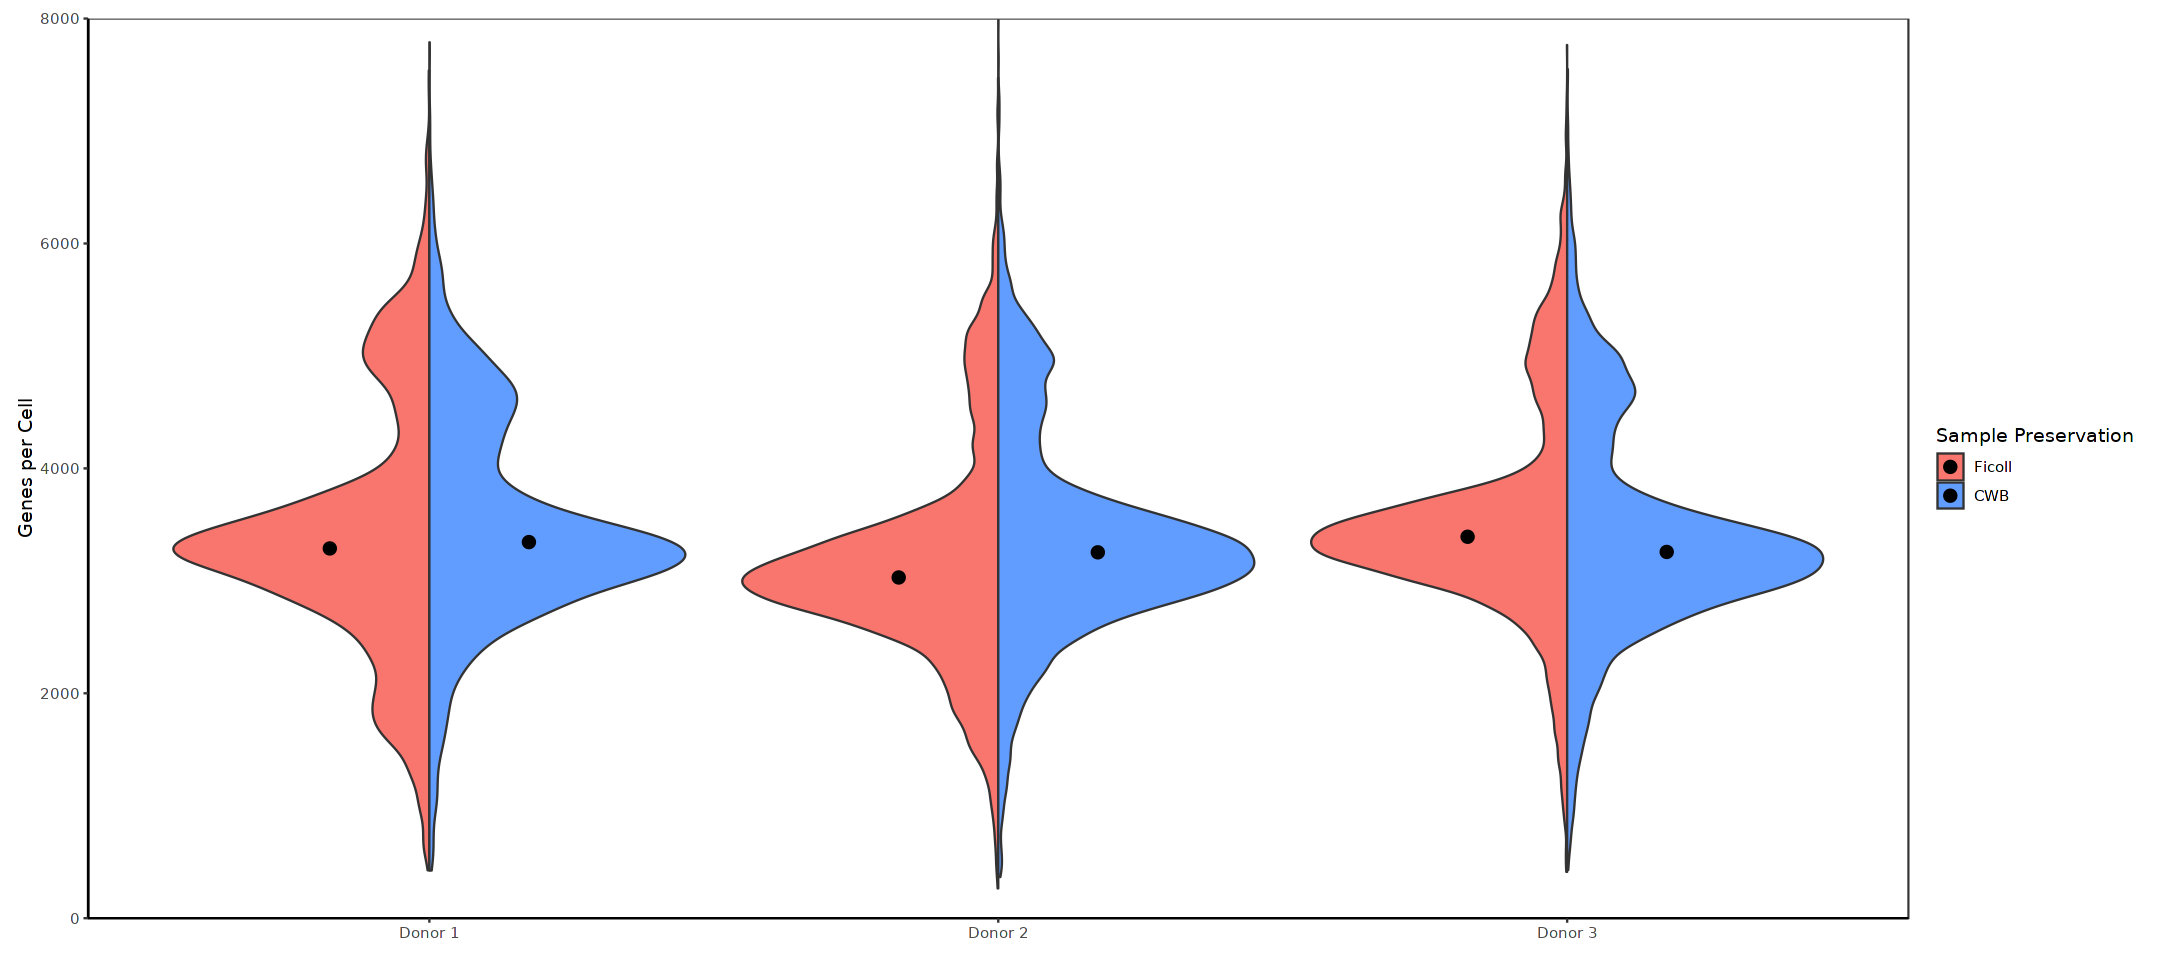

In [7]:
options(repr.plot.width=18,repr.plot.height=8) 

Idents(rna)<-'sample3' # set the metadata column to be used in plotting, use whatever one makes sense

p <- VlnPlot(rna, features = "nFeature_RNA", ncol = 1,pt.size=0, split.by='pres', split.plot=TRUE) +
     stat_summary(fun=median, geom="point", position = position_dodge(0.7),size=3, color="black") + 
     labs(x=NULL, y="Genes per Cell",color = '10X Chemistry') + 
     theme_bw() +    
     theme(axis.line = element_line(color='black'),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               text = element_text(family="sans"),
               axis.text.x = element_text(vjust = 0.7),
               plot.margin = margin(0.2,0.3,0.2,0.2, "cm"),
               plot.title = element_blank()) + 
     scale_fill_manual(name='Sample Preservation',values=pal2) +
     scale_y_continuous(limits = c(0,8000), expand = c(0,0))

p

In [8]:
pdf("Fig1_RNA_violin.pdf", width = 5.5, height = 3, onefile=TRUE)
p
invisible(dev.off())

Warning message:
“Removed 8 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_summary()`).”


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 200 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 200 rows containing non-finite values (`stat_summary()`).”


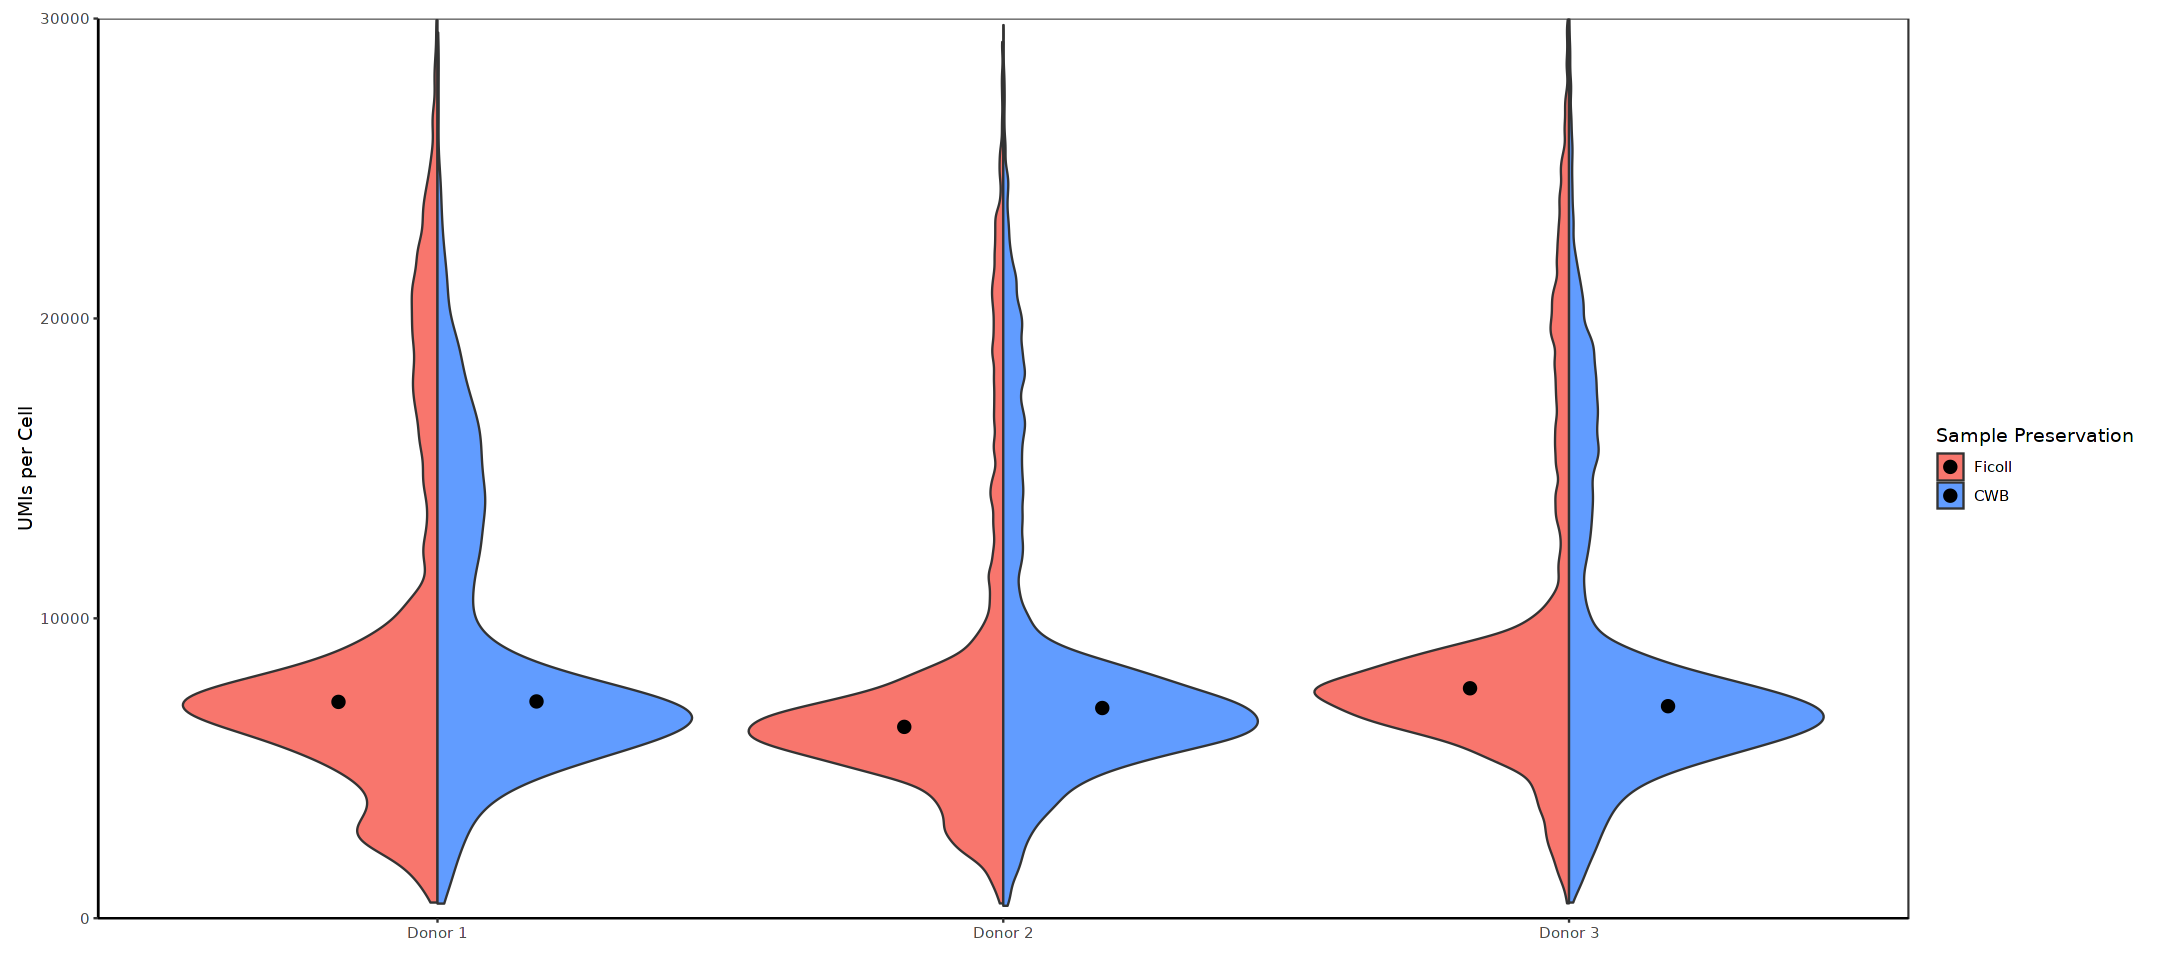

In [9]:
options(repr.plot.width=18,repr.plot.height=8) 

Idents(rna)<-'sample3' # set the metadata column to be used in plotting, use whatever one makes sense

p1 <- VlnPlot(rna, features = "nCount_RNA", ncol = 1,pt.size=0, split.by='pres', split.plot=TRUE) +
     stat_summary(fun=median, geom="point", position = position_dodge(0.7),size=3, color="black") + 
     labs(x = NULL, y = "UMIs per Cell", color = '10X Chemistry') +
     scale_fill_manual(name = 'Sample Preservation',values = pal2) +
     scale_y_continuous(limits = c(0,30000), expand = c(0,0)) +
     theme_bw() +    
     theme(axis.line = element_line(color='black'),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               text = element_text(family="sans"),
               axis.text.x = element_text(vjust = 0.7),
               plot.margin = margin(0.2,0.3,0.2,0.2, "cm"),
               plot.title = element_blank())

p1

In [10]:
pdf("Fig1_RNA_UMIs_violin.pdf", width = 5.5, height = 3, onefile=TRUE)
p1
invisible(dev.off())

Warning message:
“Removed 200 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 200 rows containing non-finite values (`stat_summary()`).”


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 509 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 509 rows containing non-finite values (`stat_summary()`).”


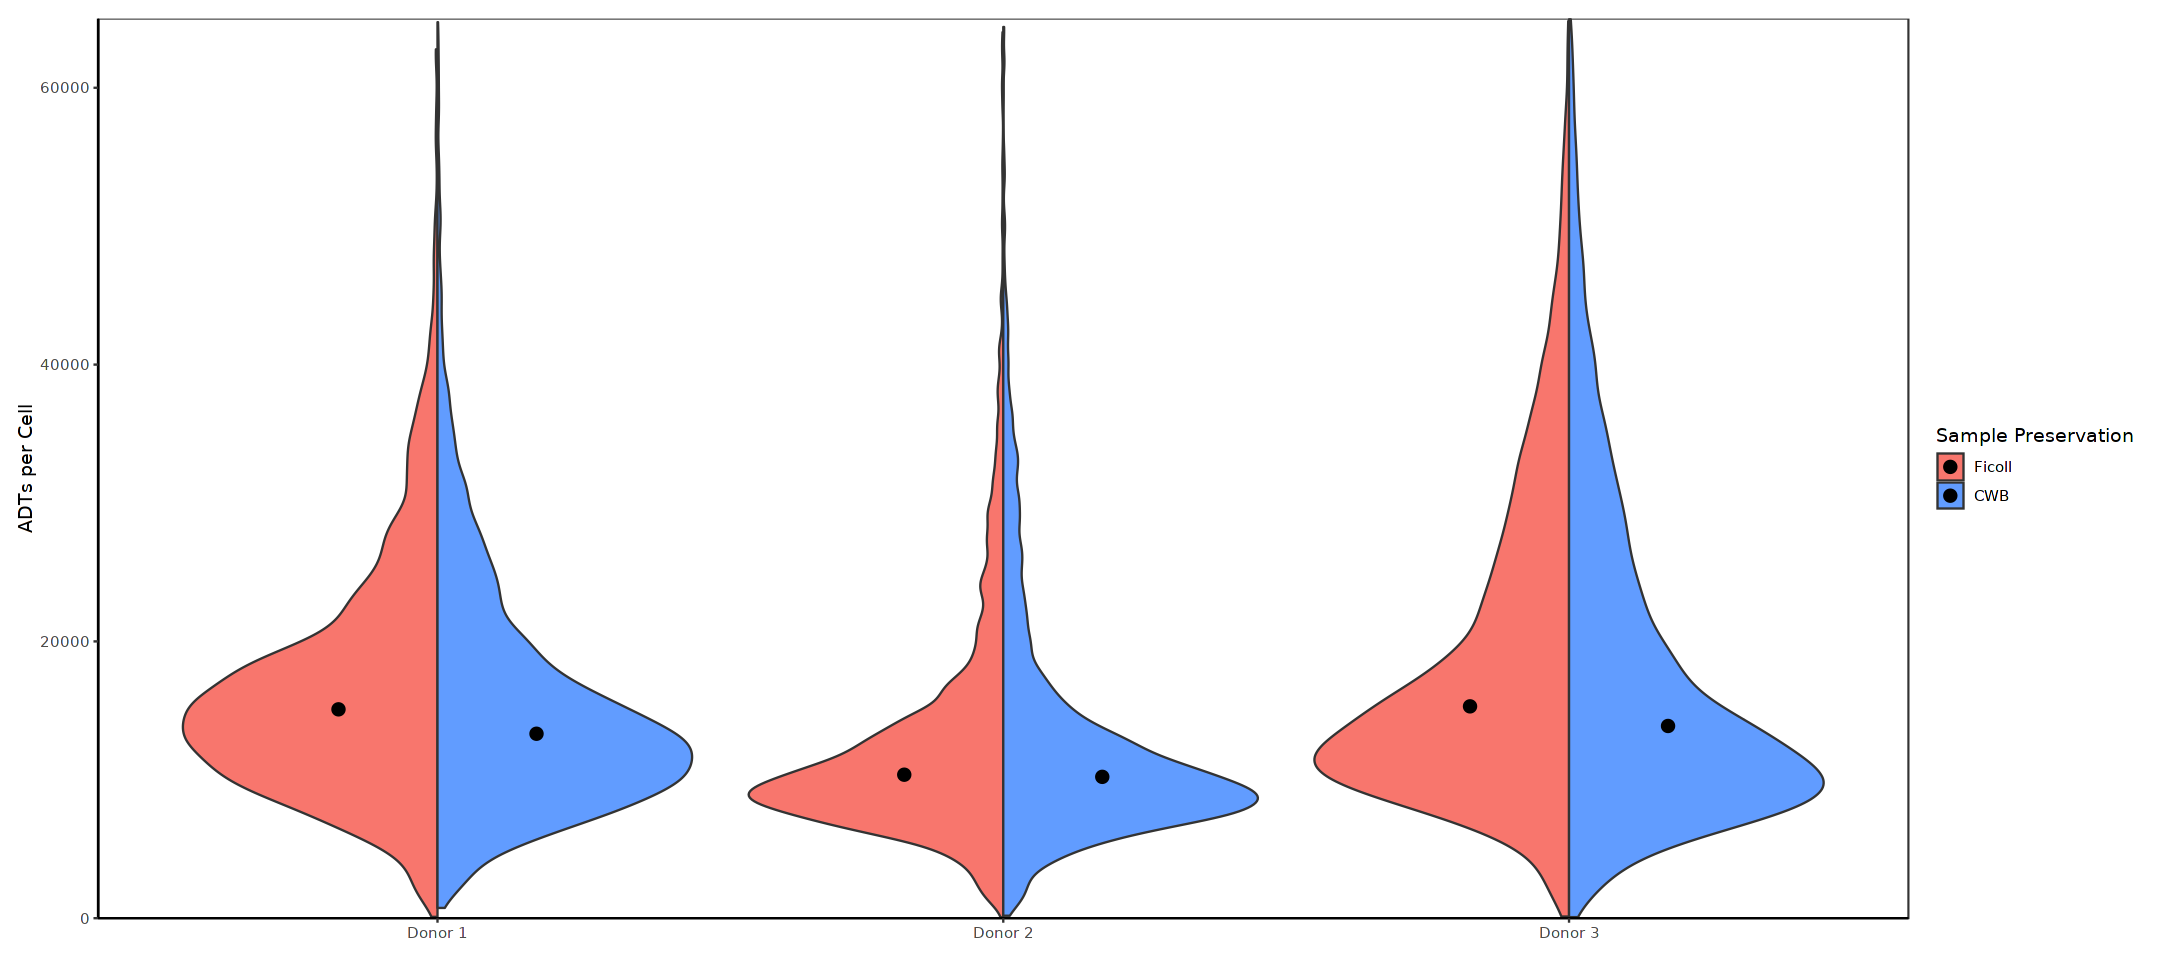

In [11]:
options(repr.plot.width=18,repr.plot.height=8) 

Idents(adt)<-'sample3' # set the metadata column to be used in plotting, use whatever one makes sense

p <- VlnPlot(adt, features = "nCount_ADT", ncol = 1,pt.size=0, split.by='pres', split.plot=TRUE) +
        stat_summary(fun=median, geom="point", position = position_dodge(0.7),size=3, color="black") + 
        labs(x = NULL, y = "ADTs per Cell", color = '10X Chemistry') +
        scale_fill_manual(name='Sample Preservation',values=pal2) +
        scale_y_continuous(limits = c(0,65000), expand = c(0,0)) +
        theme_bw() +    
        theme(axis.line = element_line(color='black'),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               text = element_text(family="sans"),
               axis.text.x = element_text(vjust = 0.7),
               plot.margin = margin(0.2,0.3,0.2,0.2, "cm"),
               plot.title = element_blank()) 

p

In [12]:
pdf("Fig1_ADT_features_violin.pdf", width = 5.5, height = 3, onefile=TRUE)
p1
invisible(dev.off())

Warning message:
“Removed 200 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 200 rows containing non-finite values (`stat_summary()`).”


### UMAPs

In [13]:
umap_names_l1 <- c('CD4 T',
                   'CD8 T',
                   'other T',
                   'B',
                   'NK',
                   'Mono',
                   'DC'
                  )

In [14]:
Idents(rna) <- 'predicted.celltype.l1'
rna_sub <- subset(x = rna, idents = c('other'), invert = TRUE)

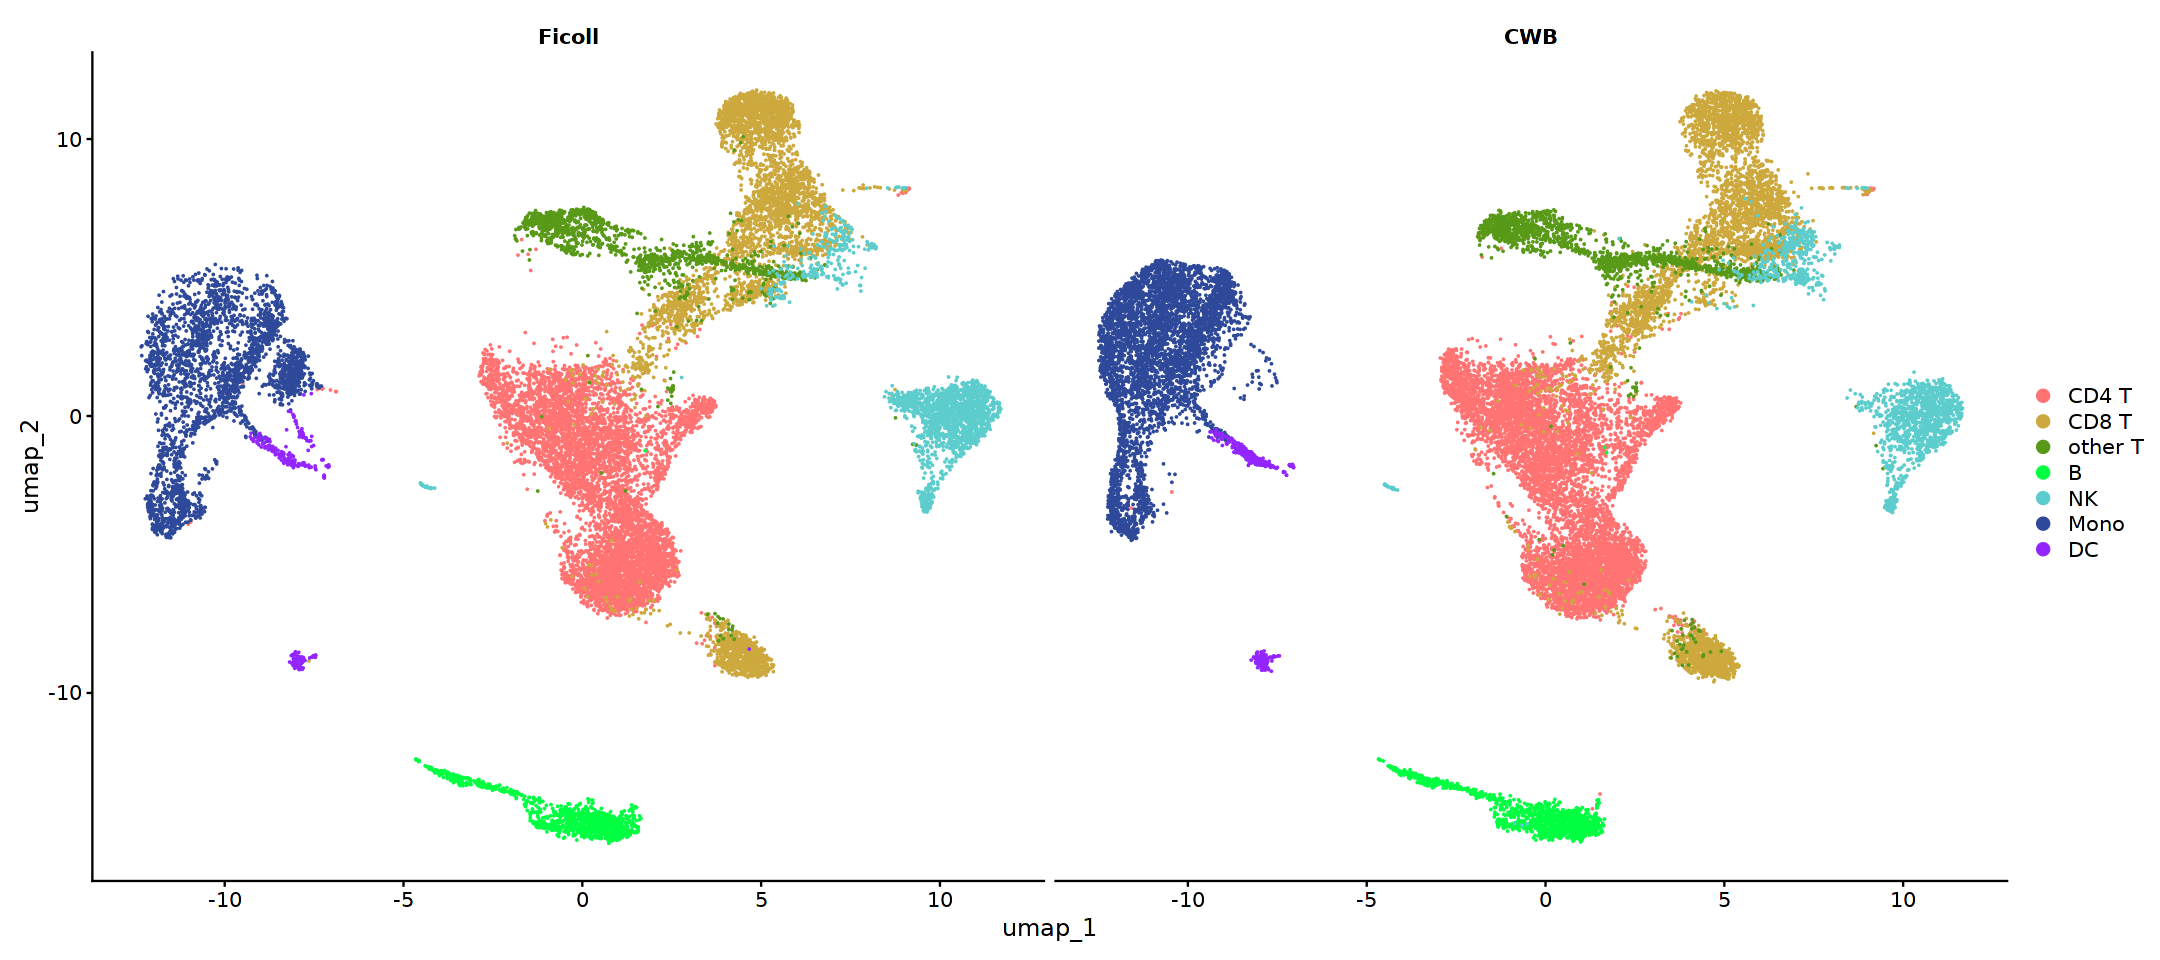

In [15]:
options(repr.plot.width=18,repr.plot.height=8)

p <- DimPlot_scCustom(seurat_object = rna_sub,             
                      reduction = "umap", 
                      group.by = "predicted.celltype.l1", 
                      label = FALSE,
                      split.by='pres',
                      split_seurat = TRUE,
                      # figure_plot = TRUE,
                      colors_use = DiscretePalette_scCustomize(num_colors = 8,palette = "varibow"),
                      pt.size=0.01,
                      order = rev(umap_names_l1)
                     ) + 
        ggtitle(NULL)

p

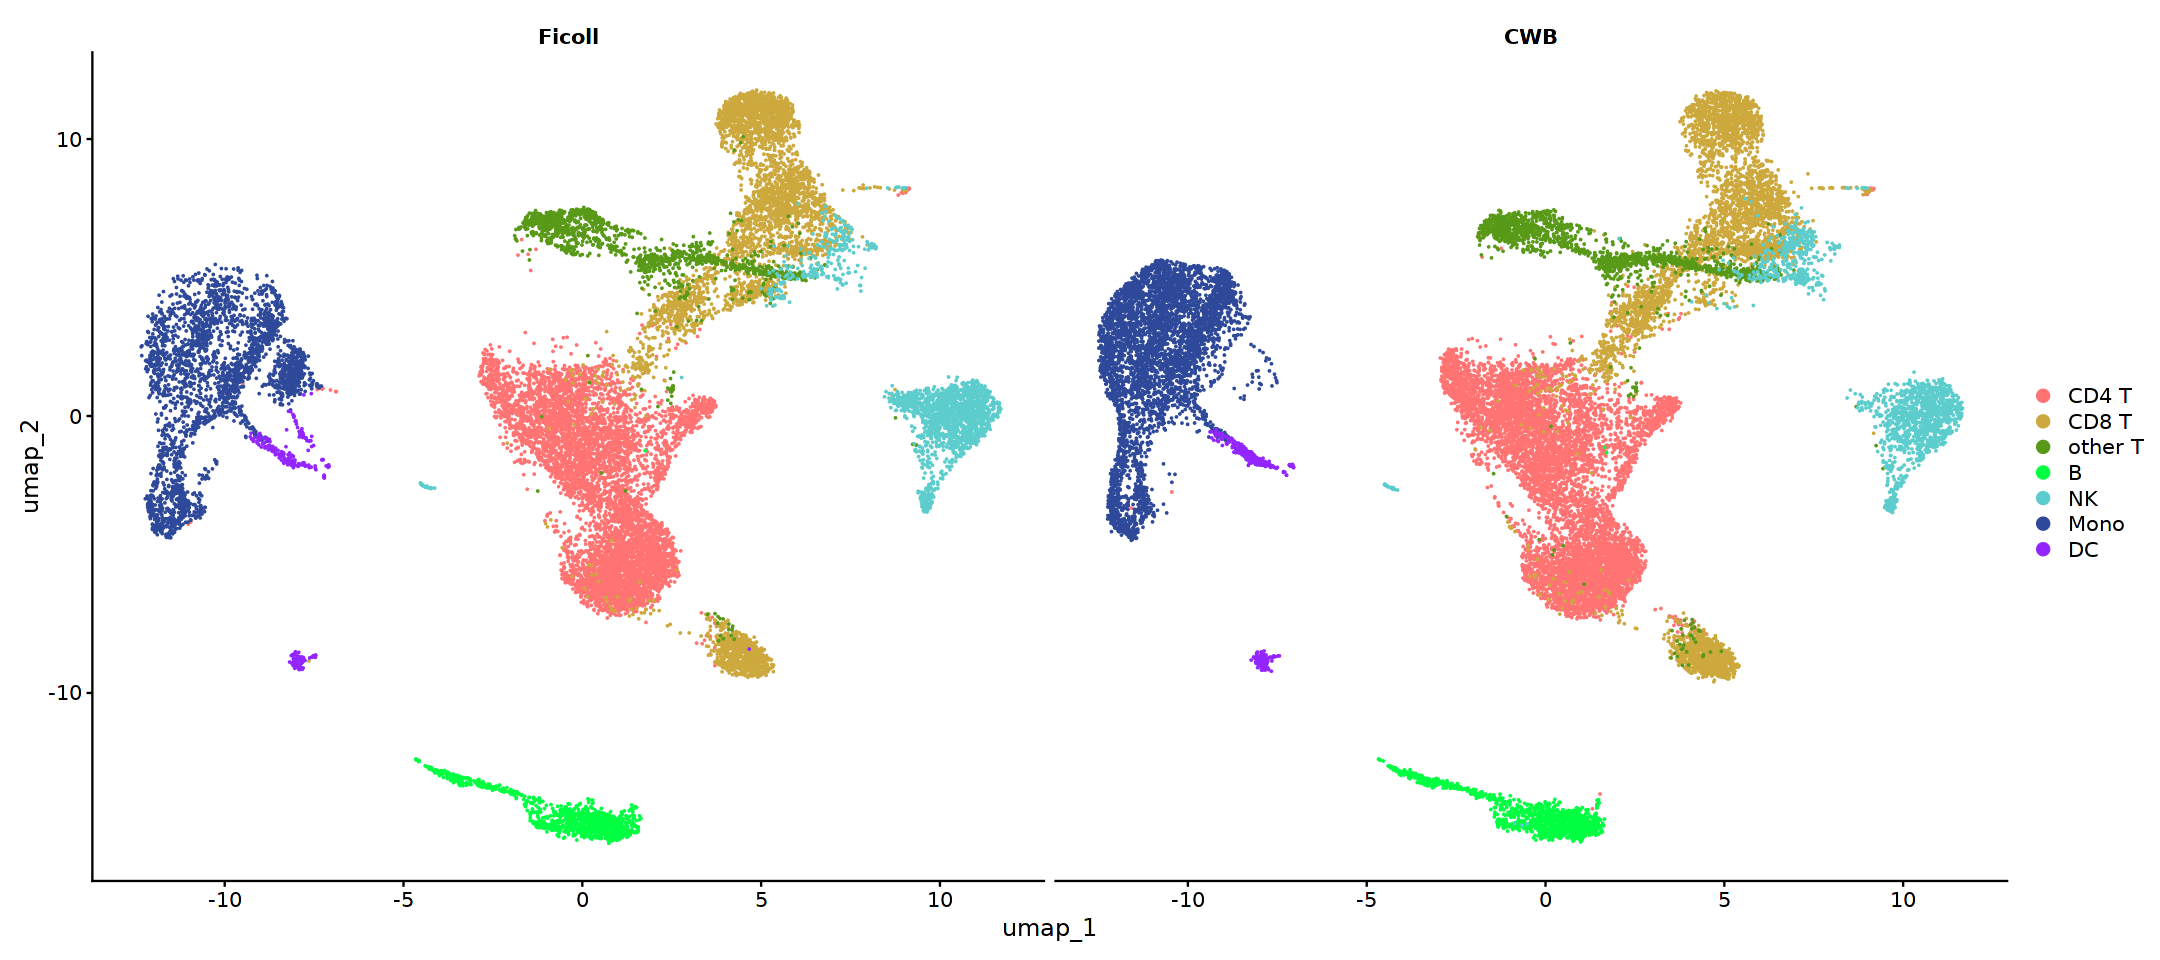

In [16]:
ggsave("Fig1_RNA_umap_l1.pdf", width = 14, height = 6, onefile=TRUE)
p
invisible(dev.off())

In [17]:
Idents(adt) <- 'predicted.celltype.l1'
adt_sub <- subset(x = adt, idents = c('other'), invert = TRUE)

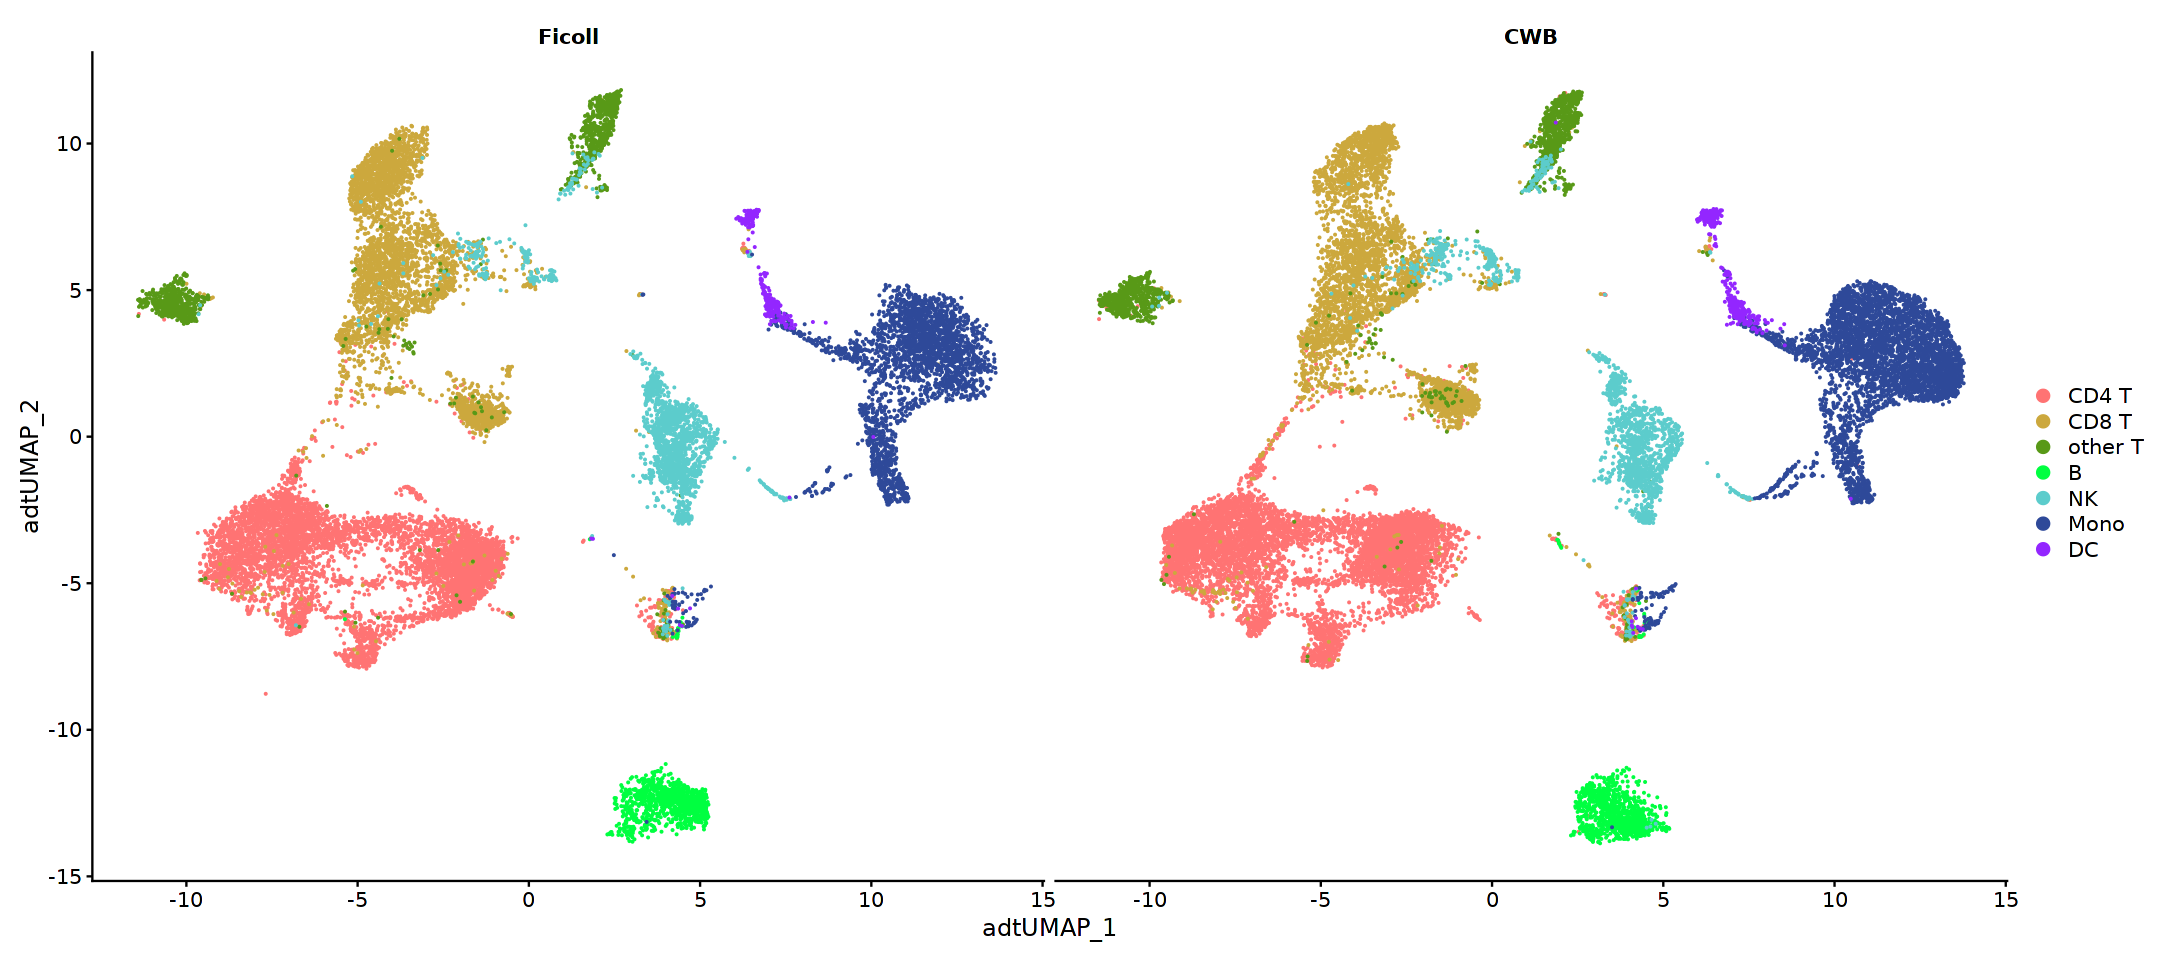

In [18]:
options(repr.plot.width=18,repr.plot.height=8)

p <- DimPlot_scCustom(seurat_object = adt_sub,             
                      # reduction = "adt.umap", 
                      group.by = "predicted.celltype.l1", 
                      label = FALSE,
                      split.by='pres',
                      split_seurat = TRUE,
                      # figure_plot = TRUE,
                      colors_use = DiscretePalette_scCustomize(num_colors = 8,palette = "varibow"),
                      # pt.size=0.25,
                      order = rev(umap_names_l1),
                      # shuffle = FALSE
                     ) +
        ggtitle(NULL)

p 

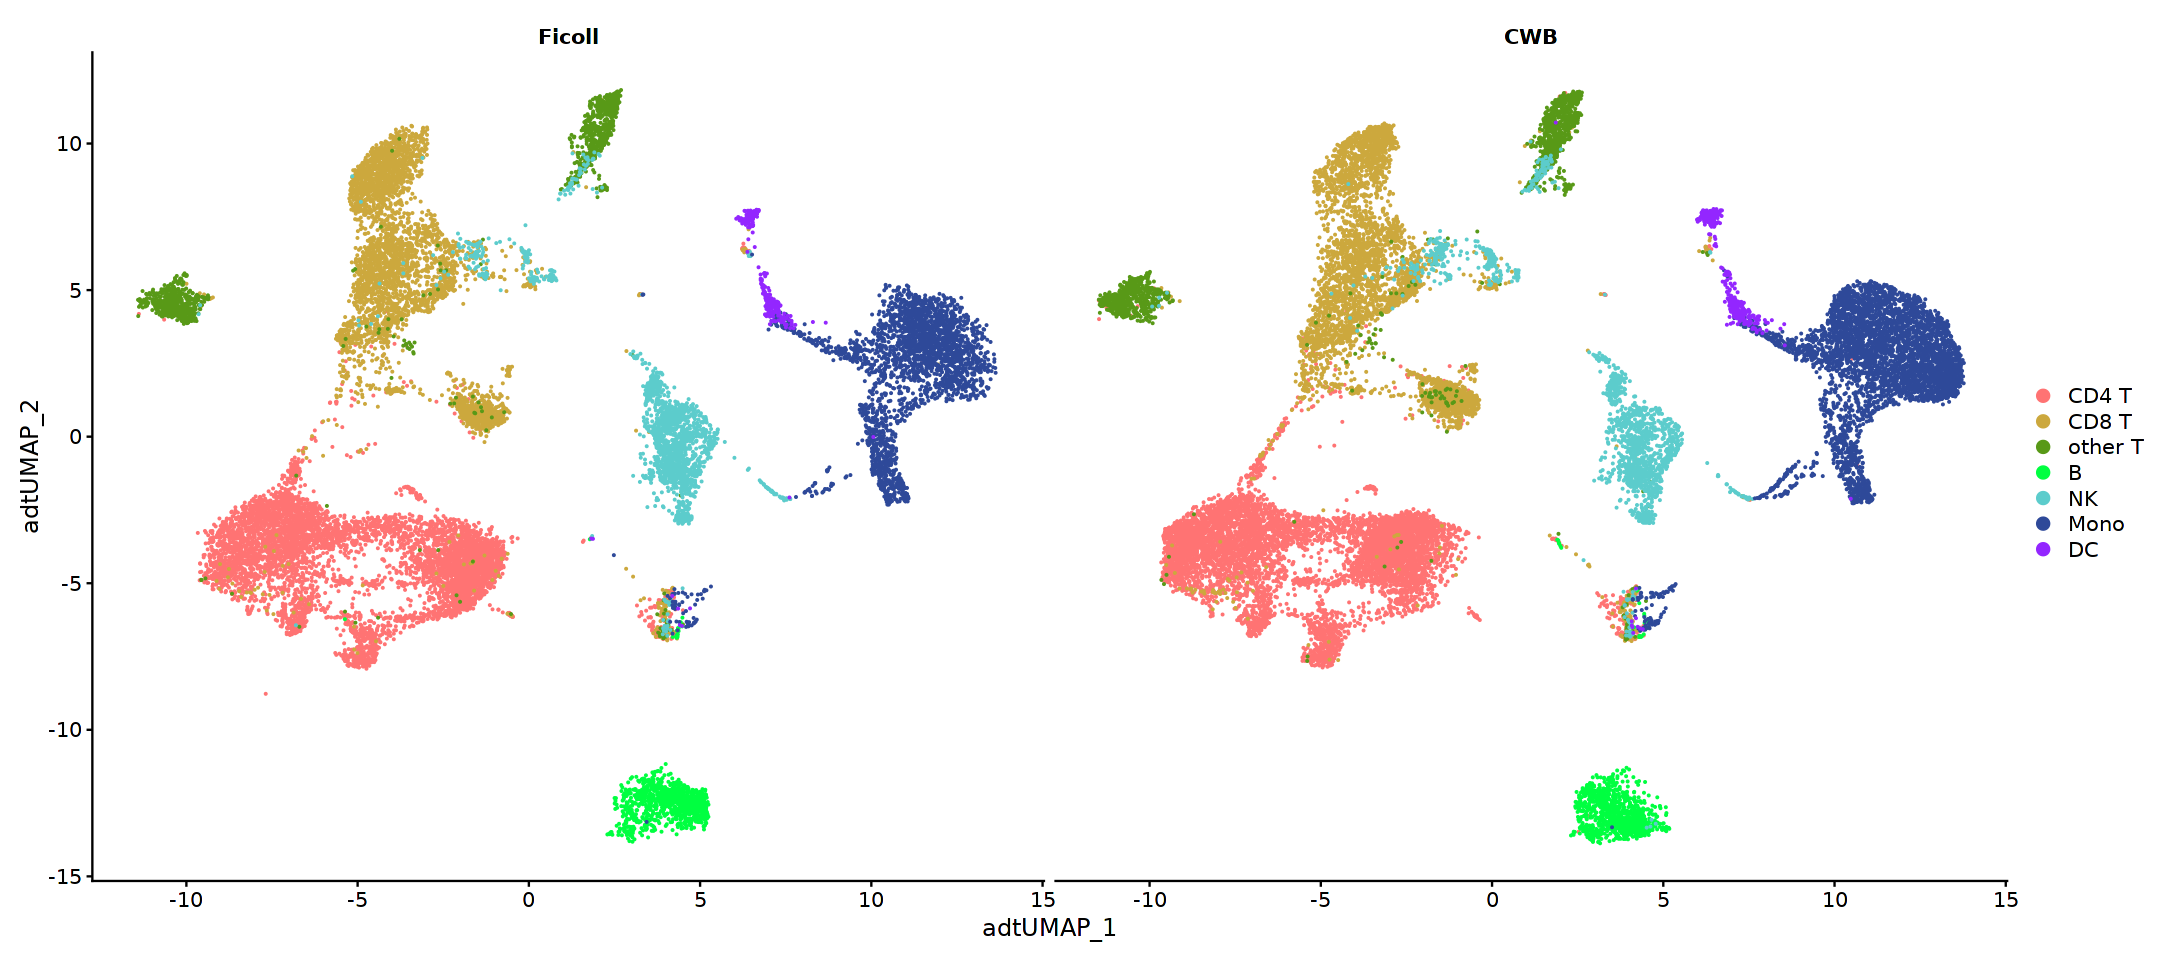

In [19]:
ggsave("Fig1_ADT_umap_l1.pdf", width = 14, height = 6, onefile=TRUE)
p
invisible(dev.off())

### Cell Porportion Function

In [20]:
#for individual sample counts
celltype_prop_multi <- function(so,lvl,metadata){
    metadata_df <- so@meta.data

    wb1_df <- filter(metadata_df,grepl("BL05111",orig.ident))
    wb2_df <- filter(metadata_df,grepl("BL05113",orig.ident))
    wb3_df <- filter(metadata_df,grepl("BL05402",orig.ident))
    pb1_df <- filter(metadata_df,grepl("PB05111",orig.ident))
    pb2_df <- filter(metadata_df,grepl("PB05113",orig.ident))
    pb3_df <- filter(metadata_df,grepl("PB05402",orig.ident))

    if (lvl == 1){counts1 <- dplyr::count(wb1_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts2 <- dplyr::count(wb2_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts3 <- dplyr::count(wb3_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts4 <- dplyr::count(pb1_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts5 <- dplyr::count(pb2_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts6 <- dplyr::count(pb3_df, predicted.celltype.l1, eval(parse(text=metadata)))}
   
    if (lvl == 2){counts1 <- dplyr::count(wb1_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts2 <- dplyr::count(wb2_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts3 <- dplyr::count(wb3_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts4 <- dplyr::count(pb1_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts5 <- dplyr::count(pb2_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts6 <- dplyr::count(pb3_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    
    names(counts1)[2] <- metadata
    names(counts2)[2] <- metadata
    names(counts3)[2] <- metadata
    names(counts4)[2] <- metadata
    names(counts5)[2] <- metadata
    names(counts6)[2] <- metadata
    
    # return(counts)
    
    sum_counts1 <- wb1_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts1)[1] <- metadata

    sum_counts2 <- wb2_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts2)[1] <- metadata

    sum_counts3 <- wb3_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts3)[1] <- metadata

    sum_counts4 <- pb1_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts4)[1] <- metadata

    sum_counts5 <- pb2_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts5)[1] <- metadata

    sum_counts6 <- pb3_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts6)[1] <- metadata
    
    # return(sum_counts)

    joined_counts1 <- left_join(counts1, sum_counts1, by = metadata)
    joined_counts2 <- left_join(counts2, sum_counts2, by = metadata)
    joined_counts3 <- left_join(counts3, sum_counts3, by = metadata)
    joined_counts4 <- left_join(counts4, sum_counts4, by = metadata)
    joined_counts5 <- left_join(counts5, sum_counts5, by = metadata)
    joined_counts6 <- left_join(counts6, sum_counts6, by = metadata)

    # print(head(joined_counts))

    joined_counts1$perc <- joined_counts1$n.x/joined_counts1$n.y
    joined_counts2$perc <- joined_counts2$n.x/joined_counts2$n.y
    joined_counts3$perc <- joined_counts3$n.x/joined_counts3$n.y
    joined_counts4$perc <- joined_counts4$n.x/joined_counts4$n.y
    joined_counts5$perc <- joined_counts5$n.x/joined_counts5$n.y
    joined_counts6$perc <- joined_counts6$n.x/joined_counts6$n.y

    joined_counts1 <- joined_counts1 %>% mutate(orig.ident='BL05111')
    joined_counts2 <- joined_counts2 %>% mutate(orig.ident='BL05113')
    joined_counts3 <- joined_counts3 %>% mutate(orig.ident='BL05402')
    joined_counts4 <- joined_counts4 %>% mutate(orig.ident='PB05111')
    joined_counts5 <- joined_counts5 %>% mutate(orig.ident='PB05113')
    joined_counts6 <- joined_counts6 %>% mutate(orig.ident='PB05402')

    joined_counts <- rbind(joined_counts1, joined_counts2, joined_counts3, joined_counts4, joined_counts5, joined_counts6)
    return(joined_counts)
    }

In [21]:
ct_rna <- celltype_prop_multi(rna,2,'type') %>% mutate(type=factor(type, levels=c("BL","PB")))

ct_rna$orig.ident <- gsub('BL05111',"Donor 1", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB05111',"Donor 1", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('BL05113',"Donor 2", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB05113',"Donor 2", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('BL05402',"Donor 3", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB05402',"Donor 3", ct_rna$orig.ident)

df <- ct_rna

df <- df %>% unite ('id', type | orig.ident, remove=FALSE)

### Level 1 Cell Type Heat Maps

In [22]:
l1_colors <-    c('CD4 T' = '#FF7373',
                  'CD8 T' = '#CCA83D',
                  'other T' = '#589917',
                  'B' = '#00FF40',
                  'NK' = '#5CCCCC',
                  'Mono' = '#2E4999',
                  'DC' = '#9326FF'
               )

In [23]:
rna$celltype_pres <- paste0(rna$predicted.celltype.l1, '_', rna$pres) # create metadata slot for celltype+stim
avg_exp_l1_rna <- rna %>% AverageExpression(group.by = 'celltype_pres', assay = 'RNA')
avg_exp_df_l1_rna <- as.data.frame(avg_exp_l1_rna$RNA)
avg_exp_df_clean_l1_rna <- avg_exp_df_l1_rna[rowSums(avg_exp_df_l1_rna)>0,] 

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
Names of identity class contain underscores ('_'), replacing with dashes ('-')
This message is displayed once every 8 hours.


In [24]:
b <- avg_exp_df_clean_l1_rna[,1:2] %>% mutate(mean = apply(avg_exp_df_clean_l1_rna[,1:2], 1, mean)) %>% slice_max(mean, n = 50) %>% rownames()
CD4t <- avg_exp_df_clean_l1_rna[,3:4] %>% mutate(mean = apply(avg_exp_df_clean_l1_rna[,3:4], 1, mean)) %>% slice_max(mean, n = 50) %>% rownames()
CD8t <- avg_exp_df_clean_l1_rna[,5:6] %>% mutate(mean = apply(avg_exp_df_clean_l1_rna[,5:6], 1, mean)) %>% slice_max(mean, n = 50) %>% rownames()
dc <- avg_exp_df_clean_l1_rna[,7:8] %>% mutate(mean = apply(avg_exp_df_clean_l1_rna[,7:8], 1, mean)) %>% slice_max(mean, n = 50) %>% rownames()
mono <- avg_exp_df_clean_l1_rna[,9:10] %>% mutate(mean = apply(avg_exp_df_clean_l1_rna[,9:10], 1, mean)) %>% slice_max(mean, n = 50) %>% rownames()
nk <- avg_exp_df_clean_l1_rna[,11:12] %>% mutate(mean = apply(avg_exp_df_clean_l1_rna[,11:12], 1, mean)) %>% slice_max(mean, n = 50) %>% rownames()
ot <- avg_exp_df_clean_l1_rna[,13:14] %>% mutate(mean = apply(avg_exp_df_clean_l1_rna[,13:14], 1, mean)) %>% slice_max(mean, n = 50) %>% rownames()

trim_list <- c(b, CD4t, CD8t, dc, mono, nk, ot)
avg_exp_df_trim_l1_rna <- avg_exp_df_clean_l1_rna[rownames(avg_exp_df_clean_l1_rna) %in% trim_list, ]  

In [25]:
b_cor <- round(cor(avg_exp_df_trim_l1_rna[,1], avg_exp_df_trim_l1_rna[,2], method = "pearson"),3)
CD4t_cor <- round(cor(avg_exp_df_trim_l1_rna[,3], avg_exp_df_trim_l1_rna[,4], method = "pearson"),3)
CD8t_cor <- round(cor(avg_exp_df_trim_l1_rna[,5], avg_exp_df_trim_l1_rna[,6], method = "pearson"),3)
dc_cor <- round(cor(avg_exp_df_trim_l1_rna[,7], avg_exp_df_trim_l1_rna[,8], method = "pearson"),3)
mono_cor <- round(cor(avg_exp_df_trim_l1_rna[,9], avg_exp_df_trim_l1_rna[,10], method = "pearson"),3)
nk_cor <- round(cor(avg_exp_df_trim_l1_rna[,11], avg_exp_df_trim_l1_rna[,12], method = "pearson"),3)
ot_cor <- round(cor(avg_exp_df_trim_l1_rna[,13], avg_exp_df_trim_l1_rna[,14], method = "pearson"),3)

cor_list <- c(b_cor,b_cor,CD4t_cor, CD4t_cor,CD8t_cor,CD8t_cor, dc_cor,dc_cor, mono_cor, mono_cor,nk_cor, nk_cor,ot_cor,ot_cor)

In [26]:
avg_exp_df_trim_l1_rna <- avg_exp_df_trim_l1_rna[,!colnames(avg_exp_df_trim_l1_rna) %in% c('other-CWB','other-Ficoll')]
avg_exp_df_trim_l1_rna <- select(avg_exp_df_trim_l1_rna,3,4,5,6,13,14,1,2,11,12,9,10,7,8)

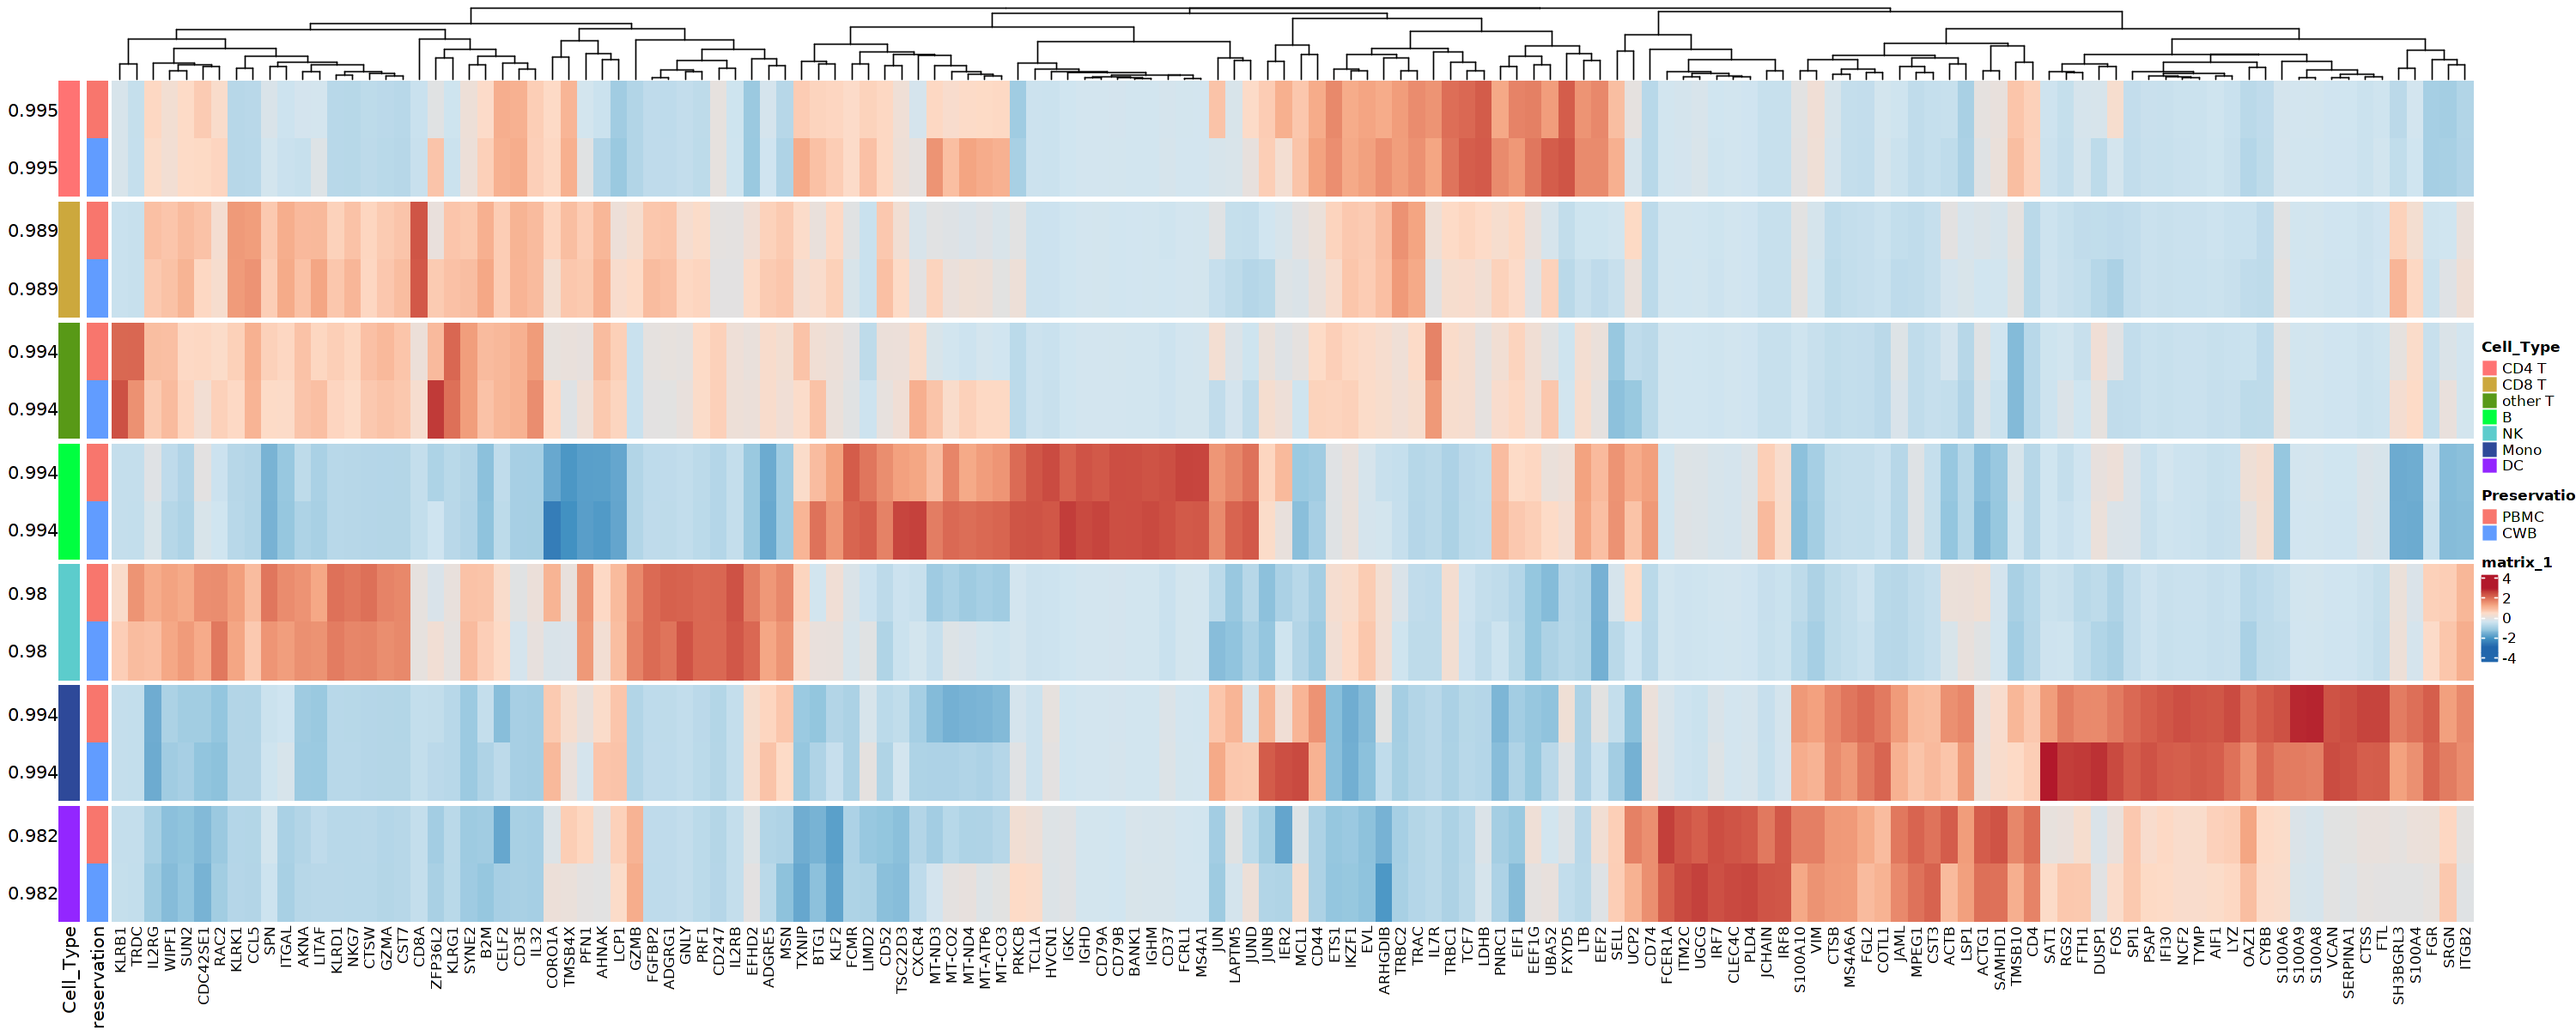

In [27]:
options(repr.plot.height=10, repr.plot.width=25)

my_sample_col <- data.frame(Preservation = rep(c("PBMC","CWB"), 7))

row.names(my_sample_col) <- colnames(avg_exp_df_trim_l1_rna)

my_sample_col$Cell_Type <- c("CD4 T", "CD4 T", "CD8 T", "CD8 T", "other T", "other T", "B", "B", "NK", "NK",  "Mono", "Mono", "DC", "DC")
my_sample_col$Preservation <- factor(my_sample_col$Preservation, levels = c("PBMC","CWB"))
my_sample_col$Cell_Type <- factor(my_sample_col$Cell_Type, levels = c("CD4 T", "CD8 T", "other T", "B", "NK", "Mono", "DC"))

my_colour = list(
    Preservation = c(PBMC = red,CWB = blue),
    Cell_Type = l1_colors
)

ha = rowAnnotation(
       Correlation = anno_text(cor_list, gp = gpar(fontsize = 12)),
       Cell_Type = my_sample_col$Cell_Type,
       Preservation = my_sample_col$Preservation,
       col = list(
            Preservation = c(PBMC = red,CWB = blue),
            Cell_Type = l1_colors),
       gap = unit(2, "mm")
       )

p <- t(avg_exp_df_trim_l1_rna) %>%
      ComplexHeatmap::pheatmap(
        scale='column',
        cluster_rows = FALSE,
        # annotation_colors = my_colour,
        # annotation_row = my_sample_col,
        left_annotation = ha,
        color = rev(RColorBrewer::brewer.pal(name = "RdBu", n = 8)),
        fontsize = 10,
        gaps_row = seq(2,14,by=2),
        # row_split = my_sample_col$Cell_Type,
        show_rownames = FALSE,
    ) 

p

In [28]:
pdf("Fig1_RNA_heatmap_l1.pdf", width = 15, height = 6, onefile=TRUE)
p
invisible(dev.off())

In [29]:
adt$bulk <- 'bulk'
bulk_df <- adt %>% AverageExpression(group.by='bulk', assay = 'ADT', layer = 'data') %>% as.data.frame()
bulk_df <- rownames_to_column(bulk_df,'x')
weak_adts <- bulk_df[bulk_df$all < 0.4022 ,][['x']]

f <- c(
    # 'CD272','CD63.1', 'CD142', # B cells - ficoll
    # 'CD42b','CD62P','CD41','CD112','CD49b', # other - ficoll
    # 'CD27.1' # CD4 T ficoll
    # 'CD185', 'CD23' 
)


The following grouping variables have 1 value and will be ignored: bulk

All grouping variables have 1 value only. Computing across all cells.



In [30]:
adt$celltype_pres <- paste0(adt$predicted.celltype.l1, '_', adt$pres) # create metadata slot for celltype+stim
avg_exp_l1 <- adt %>% AverageExpression(group.by = 'celltype_pres', assay = 'ADT')
avg_exp_df_l1 <- as.data.frame(avg_exp_l1$ADT)
avg_exp_df_clean_l1<- avg_exp_df_l1[rowSums(avg_exp_df_l1)>0,]

In [31]:
b_cor <- round(cor(avg_exp_df_clean_l1[,1], avg_exp_df_clean_l1[,2], method = "pearson"),3)
CD4t_cor <- round(cor(avg_exp_df_clean_l1[,3], avg_exp_df_clean_l1[,4], method = "pearson"),3)
CD8t_cor <- round(cor(avg_exp_df_clean_l1[,5], avg_exp_df_clean_l1[,6], method = "pearson"),3)
dc_cor <- round(cor(avg_exp_df_clean_l1[,7], avg_exp_df_clean_l1[,8], method = "pearson"),3)
mono_cor <- round(cor(avg_exp_df_clean_l1[,9], avg_exp_df_clean_l1[,10], method = "pearson"),3)
nk_cor <- round(cor(avg_exp_df_clean_l1[,11], avg_exp_df_clean_l1[,12], method = "pearson"),3)
ot_cor <- round(cor(avg_exp_df_clean_l1[,13], avg_exp_df_clean_l1[,14], method = "pearson"),3)

cor_list <- c(b_cor,b_cor,CD4t_cor, CD4t_cor,CD8t_cor,CD8t_cor, dc_cor,dc_cor, mono_cor, mono_cor,nk_cor, nk_cor,ot_cor,ot_cor)

In [32]:
avg_exp_df_clean_l1 <- avg_exp_df_clean_l1[,!colnames(avg_exp_df_clean_l1) %in% c('other-CWB','other-Ficoll')]
avg_exp_df_clean_l1 <- select(avg_exp_df_clean_l1, 3,4,5,6,13,14,1,2,11,12,9,10,7,8)

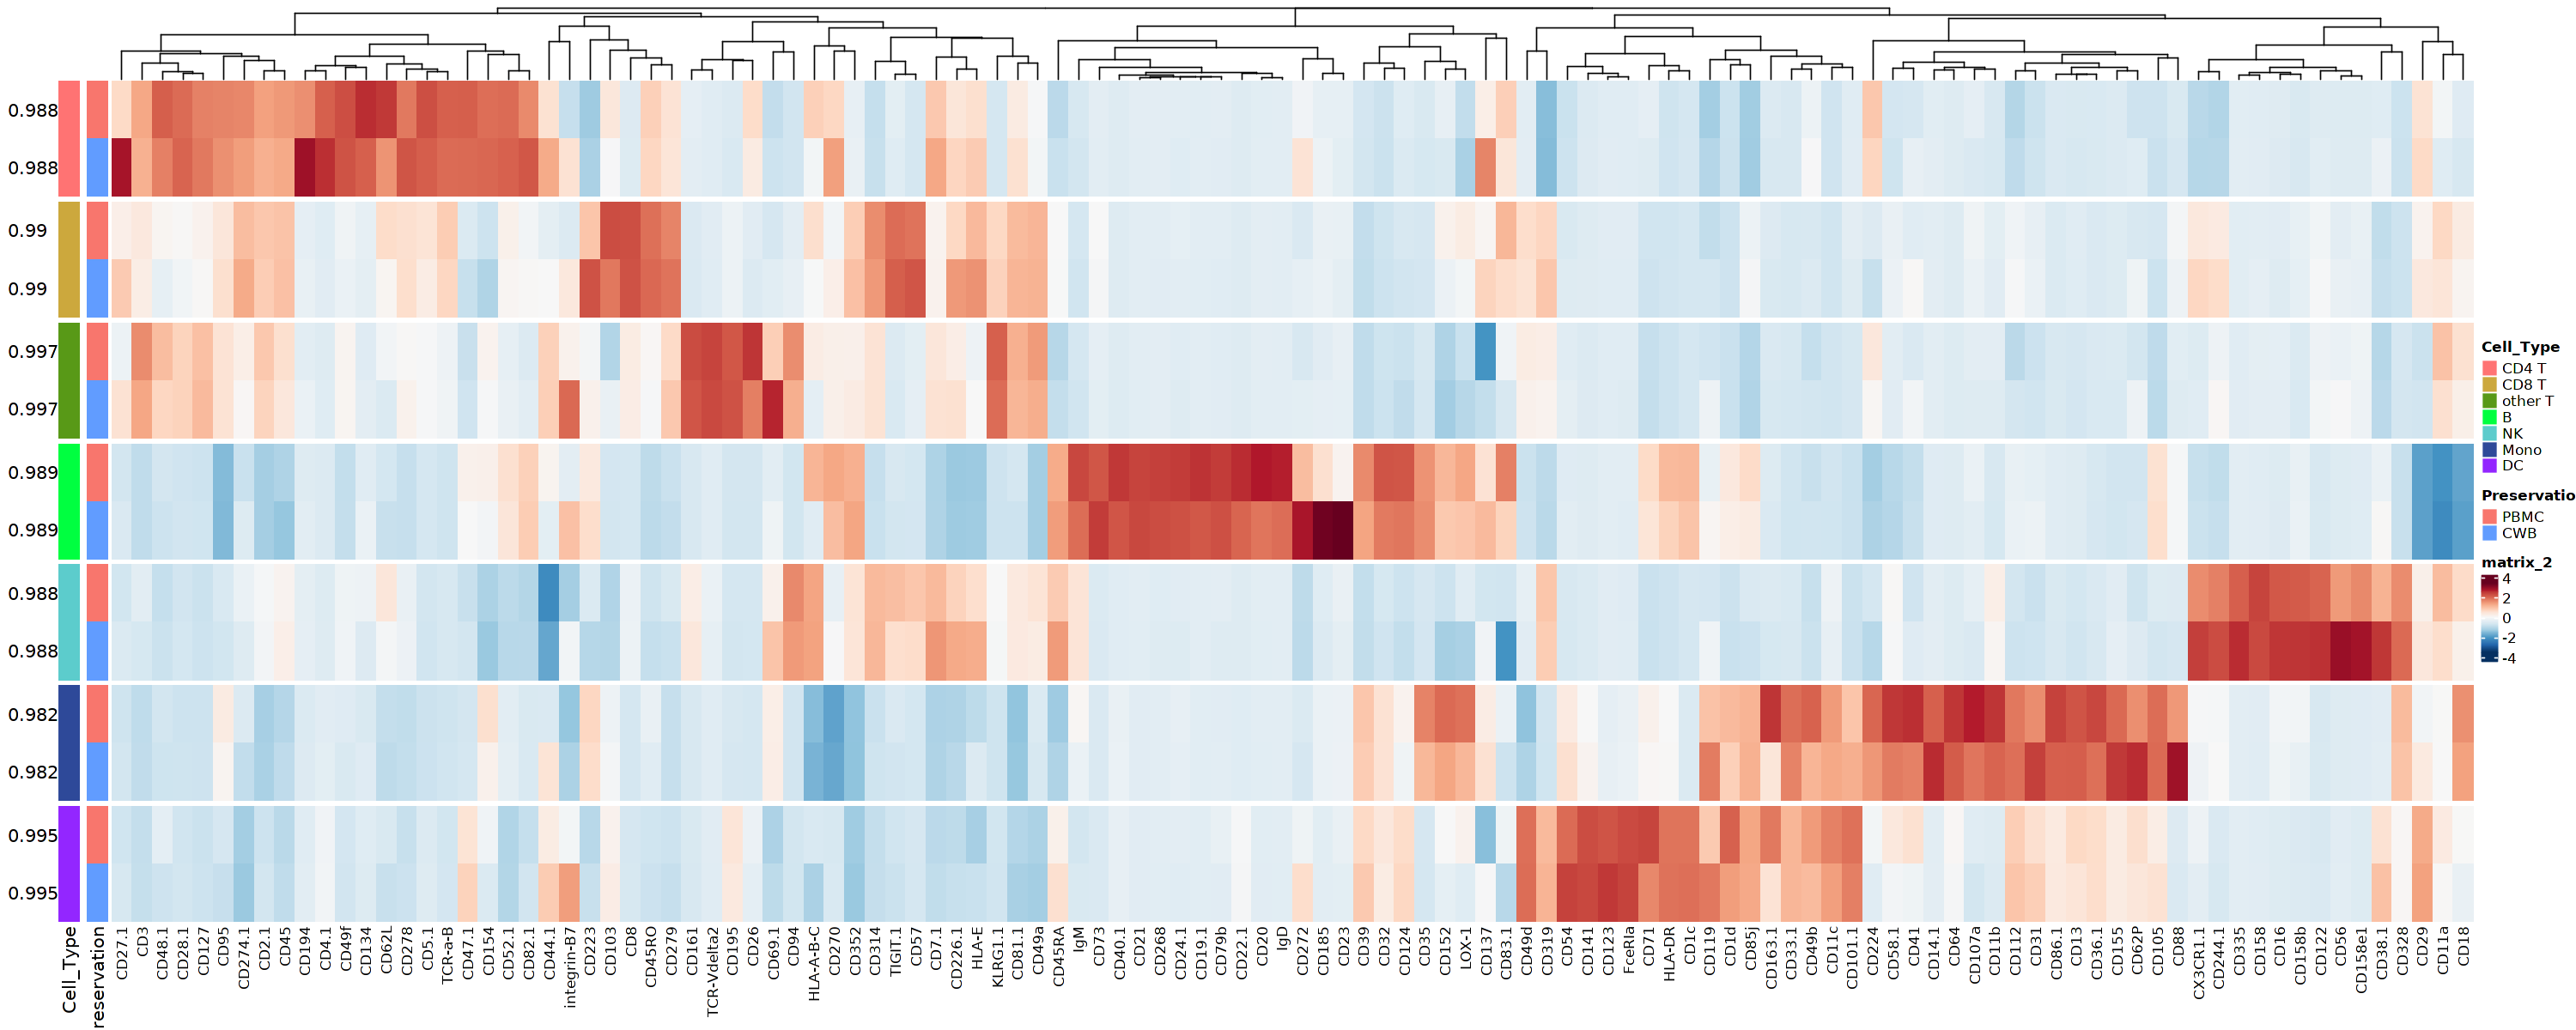

In [33]:
options(repr.plot.height=10, repr.plot.width=25)

my_sample_col <- data.frame(Preservation = rep(c("PBMC","CWB"), 7))

row.names(my_sample_col) <- colnames(avg_exp_df_trim_l1_rna)

my_sample_col$Cell_Type <- c("CD4 T", "CD4 T", "CD8 T", "CD8 T", "other T", "other T", "B", "B", "NK", "NK",  "Mono", "Mono", "DC", "DC")
my_sample_col$Preservation <- factor(my_sample_col$Preservation, levels = c("PBMC","CWB"))
my_sample_col$Cell_Type <- factor(my_sample_col$Cell_Type, levels = c("CD4 T", "CD8 T", "other T", "B", "NK", "Mono", "DC"))

my_colour = list(
    Preservation = c(PBMC = red,CWB = blue),
    Cell_Type = l1_colors
)

ha = rowAnnotation(
       Correlation = anno_text(cor_list, gp = gpar(fontsize = 12)),
       Cell_Type = my_sample_col$Cell_Type,
       Preservation = my_sample_col$Preservation,
       col = list(
            Preservation = c(PBMC = red,CWB = blue),
            Cell_Type = l1_colors),
       gap = unit(2, "mm")
       )

p <- t(avg_exp_df_clean_l1[!(rownames(avg_exp_df_clean_l1) %in% c(f, weak_adts)), ]) %>%
    ComplexHeatmap::pheatmap(
        scale='column',
        cluster_rows = FALSE,
        # annotation_colors = my_colour,
        # annotation_row = my_sample_col,
        left_annotation = ha,
        color = rev(RColorBrewer::brewer.pal(name = "RdBu", n = 11)),
        fontsize = 10,
        gaps_row = seq(2,14,by=2),
        show_rownames = FALSE,
    ) 
p

In [34]:
pdf("Fig1_ADT_heatmap_l1.pdf", width = 15, height = 5, onefile=TRUE)
p
invisible(dev.off())

### Level 1 Correlation Plots

In [35]:
ct_rna <- celltype_prop_multi(rna,1,'type') %>% mutate(type=factor(type, levels=c("BL","PB")))

ct_rna$orig.ident <- gsub('BL05111',"Donor 1", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB05111',"Donor 1", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('BL05113',"Donor 2", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB05113',"Donor 2", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('BL05402',"Donor 3", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB05402',"Donor 3", ct_rna$orig.ident)

df <- subset(ct_rna, select = -c(n.x,n.y))
df <- filter(df, predicted.celltype.l1 != "other")
bl_df <- filter(df, type == "BL") %>% rename(bl.perc=perc) %>% select(-type)
pb_df <- filter(df, type == "PB") %>% rename(pb.perc=perc) %>% select(-type)
comp_df <- left_join(bl_df, pb_df) %>% relocate(orig.ident, .before = predicted.celltype.l1)
comp_df$predicted.celltype.l1 <- factor(comp_df$predicted.celltype.l1, levels = c("CD4 T", "CD8 T", "other T", "B", "NK", "Mono", "DC", "other"))

Joining with `by = join_by(predicted.celltype.l1, orig.ident)`


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


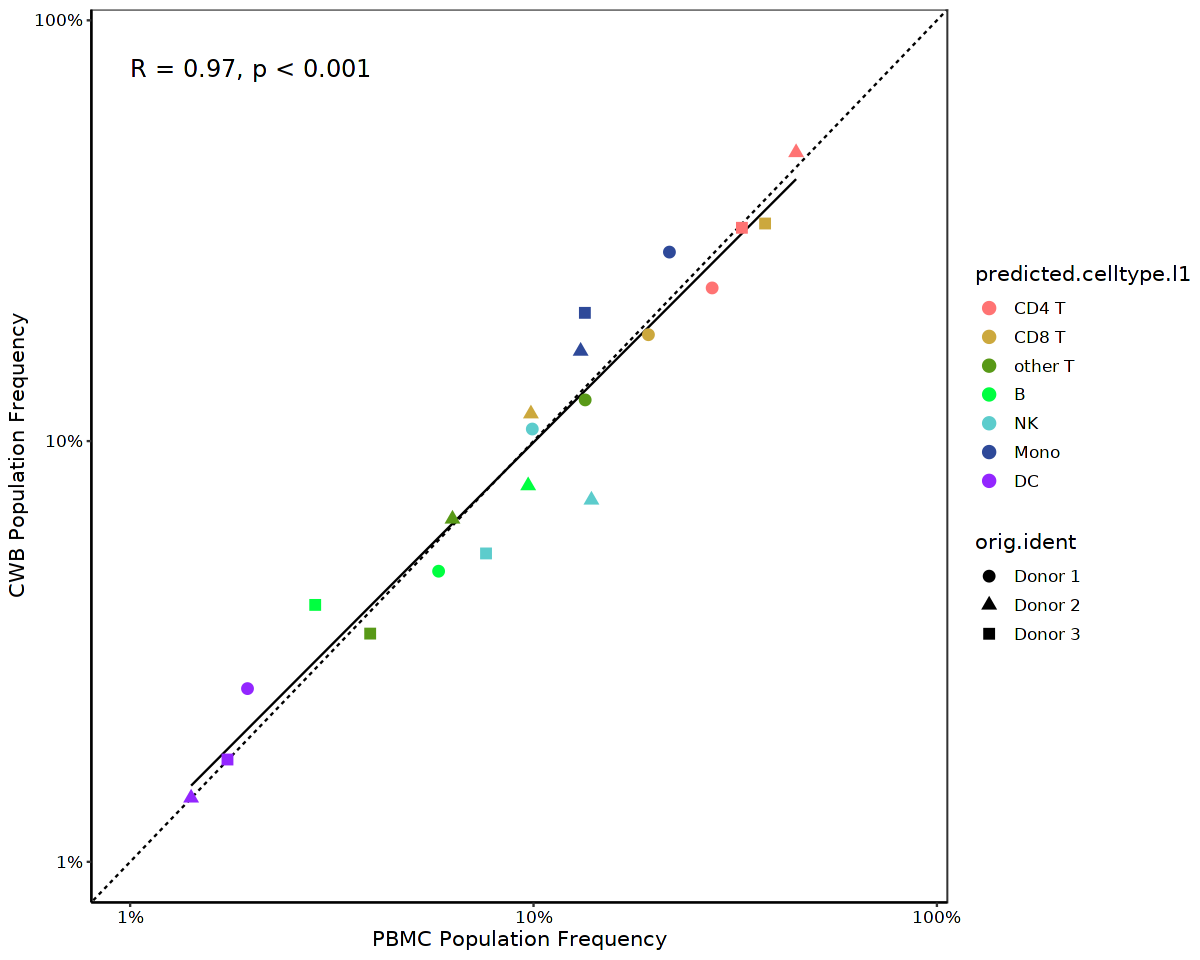

In [36]:
options(repr.plot.width=10,repr.plot.height=8) 


p <- ggplot(comp_df, aes(x = pb.perc, y = bl.perc, color = predicted.celltype.l1, shape = orig.ident)) +
     # scale_colour_manual(values = DiscretePalette_scCustomize(num_colors = 8,palette = "varibow")) +
     geom_abline(slope = 1, linetype = 'dashed', size = 0.5) +
     geom_smooth(inherit.aes = FALSE, aes(x = pb.perc, y = bl.perc), method='lm', se = FALSE, color = "black", linewidth = 0.5) +
     geom_point(size = 3) + 
     scale_color_manual(values = DiscretePalette_scCustomize(num_colors = 8,palette = "varibow")) +
     scale_x_log10(labels = scales::percent, limits = c(0.01,0.85)) +
     scale_y_log10(labels = scales::percent, limits = c(0.01,0.85)) + 
     stat_cor(inherit.aes = FALSE, aes(x = pb.perc, y = bl.perc), size = 5, 
              r.accuracy = 0.001, p.accuracy = 0.001, show.legend = FALSE) +
     xlab("PBMC Population Frequency") +
     ylab("CWB Population Frequency") +
     theme_bw() +    
     theme(
           axis.line = element_line(color='black'),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank(),
           axis.text.x=element_text(colour="black"),
           axis.text.y=element_text(colour="black"),
           text = element_text(family="sans", size = 12),
           plot.margin = margin(0.2,0.2,0.2,0.2, "cm"),
               # plot.title = element_blank()
          )

p

In [37]:
pdf("Fig1_l1_corr.pdf", width = 6, height = 4, onefile=TRUE)
p
invisible(dev.off())

`geom_smooth()` using formula = 'y ~ x'


In [38]:
cor.test(comp_df$bl.perc, comp_df$pb.perc, method = "pearson")


	Pearson's product-moment correlation

data:  comp_df$bl.perc and comp_df$pb.perc
t = 16.132, df = 19, p-value = 1.52e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9150243 0.9861131
sample estimates:
      cor 
0.9653816 
